<div class="alert alert-info" style="padding-bottom:20px; padding-top:5px"><h4 class="text-uppercase">|::| Import Libraries</h4> </div>

In [1]:
%matplotlib inline
#################################
import numpy as np
import pandas as pd
################################
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
################################
from sklearn import linear_model
from sklearn import model_selection as ms
from sklearn import metrics as m
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import train_test_split

################################################
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

<div class="alert alert-info" style="padding-bottom:20px; padding-top:5px"><h4 class="text-uppercase">1:: Data Cleaning and Preprocessing</h4> </div>

In [2]:
def get_df(file_path,zone):
    idx=9
    df=pd.read_csv(file_path)
    df.insert(loc=idx,column='zone', value=zone)
    return df

In [3]:
properties_data=get_df("input/el_maadi_el_gededaProperties.csv","el_maadi_el_gededa")
df=get_df("input/heliopolisProperties.csv","heliopolis")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/helwan-gardens_helwanProperties.csv","helwan-gardens")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/helwan_helwanProperties.csv","helwan_helwan")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/kwrnysh-helwan_helwanProperties.csv","kwrnysh-helwan_helwan")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/maadi_compoundsProperties.csv","maadi_compounds")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/nasr-cityProperties.csv","nasr-city")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/new-administrative-capitalProperties.csv","new-administrative-capital")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/new-heliopolisProperties.csv","new-heliopolis")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/oubouraqarProperties.csv","oubour")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/saqr_quraishMaadiProperties.csv","saqr_quraishMaadi")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/sarayat_el_maadiProperties.csv","arayat_el_maadi")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/shoroukProperties.csv","shorouk")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/shoubra_elkhalafwaiProperties.csv","houbra_elkhalafwai")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/shoubra_elsahelProperties.csv","shoubra_elsahel")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/shoubra_jzyr_bdrnProperties.csv","shoubra_jzyr")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/shoubra_rod_elfaragProperties.csv","shoubra_rod_elfarag")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/tagamo3Properties.csv","tagamo3")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/zahraa_el_maadiProperties.csv","zahraa_el_maadi")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/10th_of_radman_qarPropetries.csv","10th_of_radman_qarPropetries")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/mokattam_qarPropetries.csv","mokattam_qarPropetries")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/cairo-hdyq-lhrmqarPropetries.csv","cairo_hdyq_lhrmqarPropetries")
properties_data=properties_data.append(df,ignore_index=True)

df=get_df("input/matarya_qarPropetries.csv","matarya_qarPropetries")
properties_data=properties_data.append(df,ignore_index=True)


df=get_df("input/el-salam_qarPropetries.csv","el_salam_qarPropetries")
properties_data=properties_data.append(df,ignore_index=True)


df=get_df("input/marga_qarPropetries.csv","marga_qarPropetries")
properties_data=properties_data.append(df,ignore_index=True)


df=get_df("input/el-sayyeda-zeinab_qarPropetries.csv","el_sayyeda_zeinab_qarPropetries")
properties_data=properties_data.append(df,ignore_index=True)


#df=get_df("input/.csv","")


In [4]:
properties_data.head()

,address,type,rooms,bathrooms,area,floor,year_built,finishing,view,zone,price
0,"El Gazaer, New Maadi",Commercial Land,NaN,NaN,555,Main Street,NaN,NaN,NaN,el_maadi_el_gededa,"50,000"
1,"El Lasilki, New Maadi",Apartments,4.0,2.0,170,Ground,2021,Super lux,Side Street,el_maadi_el_gededa,"1,700,000"
2,"Masaken El Arayes, New Maadi",Apartments,2.0,1.0,69,3,2021,Super lux,Side Street,el_maadi_el_gededa,"370,000"
3,"El Lasilki, New Maadi",Duplex,4.0,3.0,360,5,2008,Super lux,Other,el_maadi_el_gededa,"3,300,000"
4,"El Nasr St, New Maadi",Stores,NaN,NaN,65,Super lux,Main Street,NaN,NaN,el_maadi_el_gededa,"7,000,000"


In [5]:
properties_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7554 entries, 0 to 7553
Data columns (total 11 columns):
address       7554 non-null object
type          7554 non-null object
rooms         6782 non-null float64
bathrooms     6777 non-null float64
area          7554 non-null int64
floor         7525 non-null object
year_built    7216 non-null object
finishing     6414 non-null object
view          4894 non-null object
zone          7554 non-null object
price         7554 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 649.2+ KB


#### Functions used in Modify Structure

In [6]:
def getValues(df,col_name):
    
    dl =df[col_name].unique().tolist()
    return dl

In [7]:
def modifyValues(df,col_name,actual,replacement):  
    df.loc[(df[col_name] == actual), col_name] = replacement

#### ===================================================

<div class="alert alert-danger" style="padding-bottom:10px; padding-top:5px">[:: A ::] Drop NAN </div>

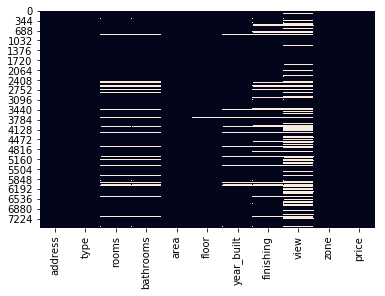

In [8]:
sns.heatmap(properties_data.isna(),cbar=False)

In [9]:
properties_data =properties_data.replace('nan', np.nan)
properties_data=properties_data.dropna(axis=0)

In [10]:
properties_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4893 entries, 1 to 7553
Data columns (total 11 columns):
address       4893 non-null object
type          4893 non-null object
rooms         4893 non-null float64
bathrooms     4893 non-null float64
area          4893 non-null int64
floor         4893 non-null object
year_built    4893 non-null object
finishing     4893 non-null object
view          4893 non-null object
zone          4893 non-null object
price         4893 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 458.7+ KB


In [11]:
old_data= properties_data.copy()

<div class="alert alert-danger" style="padding-bottom:10px; padding-top:5px">[:: B ::]  Clean price</div>

In [12]:
#### Clean price
properties_data["price"] = properties_data["price"].replace(',','', regex=True)
properties_data["price"] = properties_data["price"].astype(float)


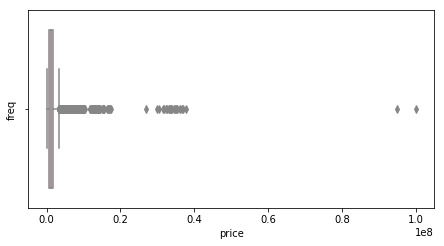

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(properties_data["price"],color="pink")
plt.xlabel('price')
plt.ylabel('freq')
plt.show()


In [14]:
properties_data["price"].min()

850.0

In [15]:
properties_data["price"].max()

100000000.0

In [16]:
properties_data = properties_data[properties_data['price'] < 9000000]
properties_data.shape

(4800, 11)

In [17]:
properties_data = properties_data[properties_data['price'] >100000]
properties_data.shape

(4793, 11)

C:\Users\user\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


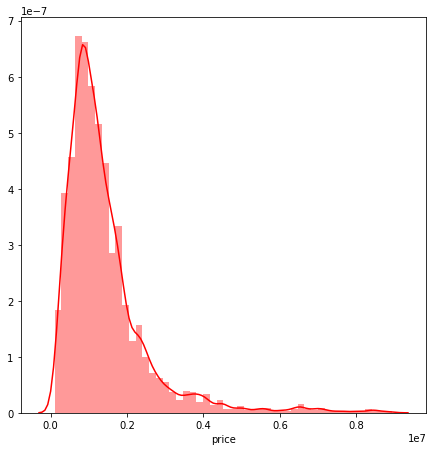

In [18]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
sns.distplot(properties_data['price'],color="red")

plt.show()

<div class="alert alert-danger" style="padding-bottom:10px; padding-top:5px">:::] Add Age feature</div> 

In [19]:
idx = 7
properties_data["year_built"] = properties_data["year_built"].astype(int)
properties_data.insert(loc=idx,column='age', value=(2021-properties_data['year_built']))
#Drop year_built
properties_data.drop('year_built', inplace=True, axis=1)

<div class="alert alert-danger" style="padding-bottom:10px; padding-top:5px">:::] Add price_per_meter feature</div> 

In [20]:
#idx = 8
#properties_data["area"] = properties_data["area"].astype(float)
#### Clean price
#properties_data["price"] = properties_data["price"].replace(',','', regex=True)
#properties_data["price"] = properties_data["price"].astype(float)

#properties_data.insert(loc=idx,column='price_per_m', value=(properties_data['price']/properties_data['area']))

<div class="alert alert-danger" style="padding-bottom:10px; padding-top:5px">[:: C ::] Delete Odd Property Types</div>

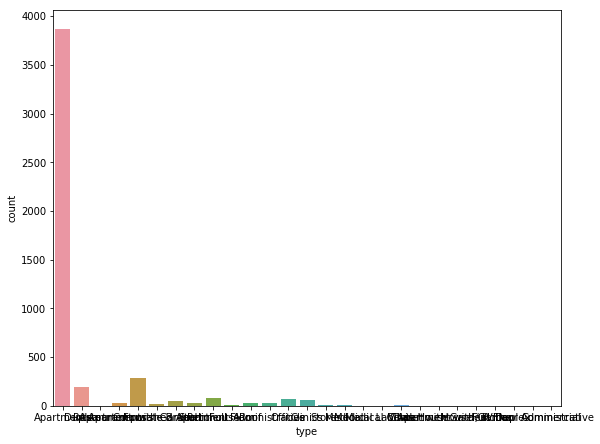

In [21]:
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
sns.countplot(x="type",data=properties_data)
plt.show()

In [22]:
print (getValues(properties_data,"type"))

['Apartments', 'Duplex', 'Restaurant', 'Apartments ', 'Apartment with Garden', 'Corporate Branch', 'Furnished Apartment', 'Studio', 'Penthouse', 'Full Floor', 'Roof', 'Administrative', 'Offices', 'Clinics', 'Stores', 'Medical', 'Medical Lab', 'Medical Center', 'Villas', 'Twin House', 'Chalet with Garden', 'Apartment with Garden ', 'House / Home', 'iVilla', 'Duplex ', 'Full Floor Administrative', 'Commercial']


In [23]:
modifyValues(properties_data,"type","Apartments ","Apartments")
modifyValues(properties_data,"type","House / Home","Apartments")
modifyValues(properties_data,"type","Apartment with Garden","Apartments")
modifyValues(properties_data,"type","Apartment with Garden ","Apartments")
modifyValues(properties_data,"type","Chalet with Garden","Apartments")
modifyValues(properties_data,"type","Duplex","Apartments")
modifyValues(properties_data,"type","Duplex ","Apartments")

print (getValues(properties_data,"type"))

['Apartments', 'Restaurant', 'Corporate Branch', 'Furnished Apartment', 'Studio', 'Penthouse', 'Full Floor', 'Roof', 'Administrative', 'Offices', 'Clinics', 'Stores', 'Medical', 'Medical Lab', 'Medical Center', 'Villas', 'Twin House', 'iVilla', 'Full Floor Administrative', 'Commercial']


In [24]:
len(properties_data.loc[(properties_data["type"]=="Apartments") ])

4375

In [25]:
index = properties_data.index
condition = properties_data["type"] != "Apartments"
other_type_index = index[condition]

properties_data.drop(other_type_index, axis =0, inplace = True)

<div class="alert alert-danger" style="padding-bottom:10px; padding-top:5px">[:: D ::] Delete Odd Property View</div>

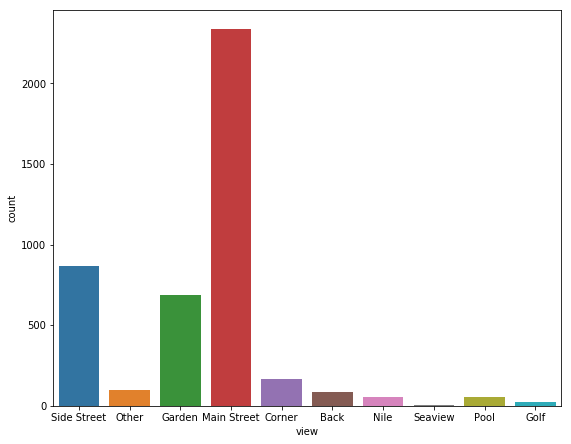

In [26]:
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
sns.countplot(x="view",data=properties_data)
plt.show()

In [27]:
print ("the values in \"view\" feature:")
print (getValues(properties_data,"view"))


the values in "view" feature:
['Side Street', 'Other', 'Garden', 'Main Street', 'Corner', 'Back', 'Nile', 'Seaview', 'Pool', 'Golf']


In [28]:
modifyValues(properties_data,"view","Side Street","side_street")
modifyValues(properties_data,"view","Main Street","main_street")
modifyValues(properties_data,"view","Golf","Garden")
modifyValues(properties_data,"view","Back","side_street")
modifyValues(properties_data,"view","Seaview","waterview")
modifyValues(properties_data,"view","Pool","waterview")
modifyValues(properties_data,"view","Nile","waterview")

########################
print (getValues(properties_data,"view"))
 

['side_street', 'Other', 'Garden', 'main_street', 'Corner', 'waterview']


In [29]:
properties_data.loc[properties_data["view"]=="Other"]

,address,type,rooms,bathrooms,area,floor,age,finishing,view,zone,price
3,"El Lasilki, New Maadi",Apartments,4.0,3.0,360,5,13,Super lux,Other,el_maadi_el_gededa,3300000.0
25,"El Lasilki, New Maadi",Apartments,3.0,3.0,160,1,16,Super lux,Other,el_maadi_el_gededa,1500000.0
83,"El Lasilki, New Maadi",Apartments,3.0,2.0,180,4,3,Super lux,Other,el_maadi_el_gededa,2000000.0
98,"Palestine Rd, New Maadi",Apartments,3.0,2.0,230,9,-9,Super lux,Other,el_maadi_el_gededa,1700000.0
255,21 Farid Heliopolis,Apartments,3.0,4.0,275,5,1,Super lux,Other,heliopolis,4250000.0
315,عمارات خلف العبور - مصر الجديدة,Apartments,2.0,1.0,120,1,-9,Super lux,Other,heliopolis,1200000.0
419,"Gisr Elswis Elgedidah, Gisr El Swis",Apartments,2.0,1.0,85,6,-9,Super lux,Other,heliopolis,300000.0
437,"Gisr Elswis Elgedidah, Gisr El Swis",Apartments,3.0,1.0,150,6,7,Semi Finished,Other,heliopolis,450000.0
802,"Lami Al Moteai, Helwan Gardens",Apartments,2.0,1.0,120,4,-9,Super lux,Other,helwan-gardens,490000.0
809,"Cornich El Maadi, El Maadi",Apartments,2.0,1.0,130,9,1,Super lux,Other,helwan-gardens,570000.0


In [30]:
for i in [1746,1867,1868,1880,2147,2149,2185,2192,2194,2195,2197,2203,83,98,255,315,5732]:
    properties_data["view"].loc[properties_data["view"].index == i]="main_street"

for i in [802,809,1063,175,1837,1844,1878,1879,1881,1890,1898,1906,1928,1997,1999,2002,2183,2125
          ,2140,2083,2200,2205,2212,2215,2216,2224,2240,2247,2255,2260,2277,437,1075,25,3,2842
         ,3961,4050,4051,419,4558,4964,3442]:
    properties_data["view"].loc[properties_data["view"].index == i]="side_street"

for i in [1247,1403,1494,1507,1508,1558,1659,1715,2396,2789,2537,2917,3722,4201,4212,4218
          ,4238,4347,4352,4360,4373,4467,4567,4621,4650,4899,4880]:
    properties_data["view"].loc[properties_data["view"].index == i]="Garden"

    

C:\Users\user\Anaconda2\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
index = properties_data.index
condition = properties_data["view"] == "Other"
other_view_index = index[condition]

properties_data.drop(other_view_index, axis =0, inplace = True)

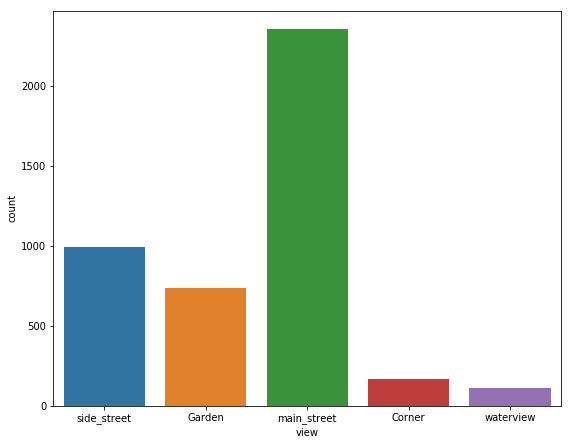

In [32]:
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
sns.countplot(x="view",data=properties_data)
plt.show()

In [33]:
properties_data.loc[properties_data["view"]=="Nile"]

,address,type,rooms,bathrooms,area,floor,age,finishing,view,zone,price


<div class="alert alert-danger" style="padding-bottom:10px; padding-top:5px">[:: E ::] Delete Odd Property finishing</div>

In [34]:
print ("the values in \"view\" feature:")
print (getValues(properties_data,"finishing"))


the values in "view" feature:
['Super lux', 'Semi Finished', 'Extra super lux', 'Lux', 'Without Finish', 'semi_finished', 'super_lux', 'without_finish', 'lux', 'extra_super_lux']


In [35]:
modifyValues(properties_data,"finishing","Semi Finished","semi_finished")
modifyValues(properties_data,"finishing","Extra super lux","extra_super_lux")
modifyValues(properties_data,"finishing","Without Finish","without_finish")
modifyValues(properties_data,"finishing","Super lux","super_lux")
modifyValues(properties_data,"finishing","lux","Lux")

########################
getValues(properties_data,"finishing")

['super_lux', 'semi_finished', 'extra_super_lux', 'Lux', 'without_finish']

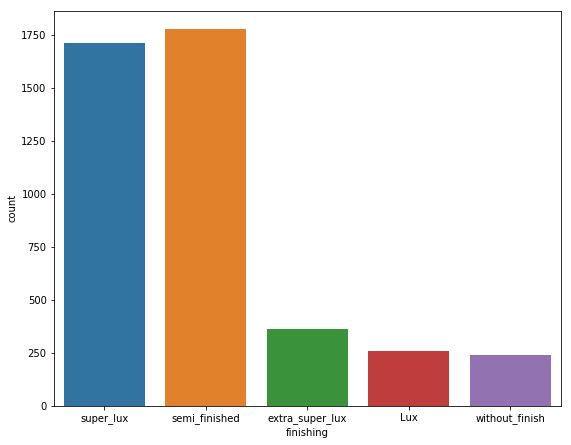

In [36]:
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
sns.countplot(x="finishing",data=properties_data)
plt.show()

<div class="alert alert-danger" style="padding-bottom:10px; padding-top:5px">[:: G ::] Delete Odd Property floor</div>

In [37]:
print ("the values in \"floor\" feature:")
print (getValues(properties_data,"floor"))

the values in "floor" feature:
['Ground', '3', '5', '6', '10', '4', '2', '7', '1', '11', '8', '9', '12', '13', '14', '62', '15', '31', '20', 11L, 12L, 5L, 1L, 3L, 9L, 4L, 10L, 7L, 8L, 2L, 6L]


In [38]:
modifyValues(properties_data,"floor","Ground","0")
properties_data["floor"] = properties_data["floor"].astype(int)
print (getValues(properties_data,"floor"))

[0L, 3L, 5L, 6L, 10L, 4L, 2L, 7L, 1L, 11L, 8L, 9L, 12L, 13L, 14L, 62L, 15L, 31L, 20L]


####  Convert Types

In [39]:
properties_data["rooms"] = properties_data["rooms"].astype(int)
properties_data["bathrooms"] = properties_data["bathrooms"].astype(int)
properties_data["area"] = properties_data["area"].astype(float)

### Handel Outliers

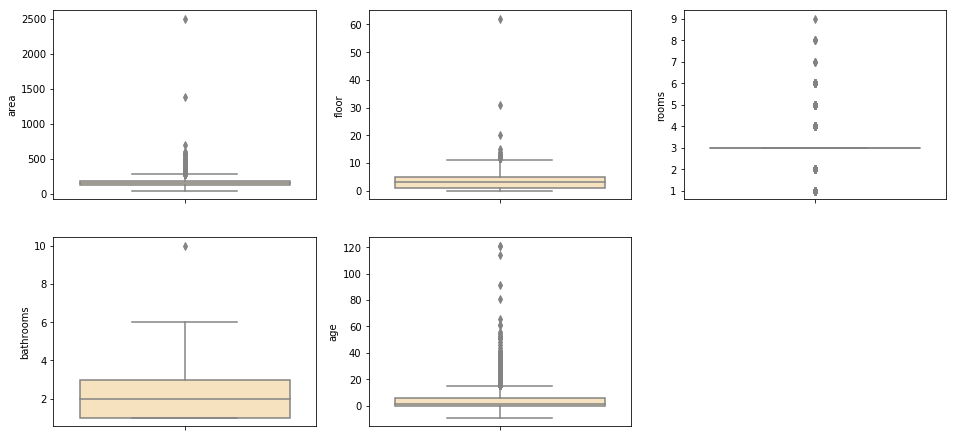

In [40]:
plt.figure(figsize=(16,16))
plt.subplot(4,3,1)
sns.boxplot(data=properties_data,y='area',color="moccasin")

plt.subplot(4,3,2)
sns.boxplot(data=properties_data,y='floor',color="moccasin")

plt.subplot(4,3,3)
sns.boxplot(data=properties_data,y='rooms',color="moccasin")

plt.subplot(4,3,4)
sns.boxplot(data=properties_data,y='bathrooms',color="moccasin")

plt.subplot(4,3,5)
sns.boxplot(data=properties_data,y='age',color="moccasin")
#plt.subplot(4,3,6)
#sns.boxplot(data=properties_data,y='price_per_m',color="moccasin")


plt.show()

In [41]:
df_cap = properties_data.copy()

In [42]:
def outlier_cap(df,col_name,percentage):
    percentileLow = df[col_name].quantile(percentage)
    percentileHigh = df[col_name].quantile(1-percentage)
    
    if(percentage==0.25):
        iqr = (percentileHigh - percentileLow)
        upper_limit = percentileHigh + 1.5 * iqr
        lower_limit = percentileLow - 1.5 * iqr
    else:
        upper_limit = percentileHigh 
        lower_limit = percentileLow
    
    #capping
    df_cap[col_name] = np.where(
        df_cap[col_name] > upper_limit, upper_limit
        ,np.where(
            df_cap[col_name] < lower_limit,lower_limit 
            ,df_cap[col_name] ##else
        )
    )

    

In [43]:
def Visualize_effect(old_df,col_name):
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.scatterplot(data=old_df,x=col_name, y="price")

    plt.subplot(2,2,2)
    sns.boxplot(old_df[col_name],color="moccasin")
    plt.subplot(2,2,3)
    sns.scatterplot(data=df_cap,x=col_name, y="price")
    plt.subplot(2,2,4)
    sns.boxplot(df_cap[col_name],color="moccasin")
    plt.show()


<div class="alert alert-danger" style="padding-bottom:10px; padding-top:5px">[:: A ::] Delete Floor Outliers</div> 

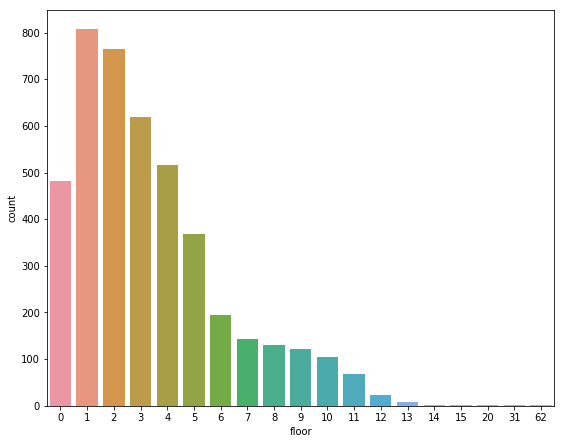

In [44]:
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
sns.countplot(x="floor",data=df_cap)
plt.show()

In [45]:
df_cap.loc[properties_data["floor"]>15]

,address,type,rooms,bathrooms,area,floor,age,finishing,view,zone,price
1744,"Al Moshir Tantawy Axis, Nasr City",Apartments,3,2,135.0,62,0,semi_finished,main_street,nasr-city,850000.0
2561,"31 North Tower - Nile Developments, New Capita...",Apartments,1,1,83.0,31,0,extra_super_lux,main_street,new-administrative-capital,3735000.0
4802,"Shobra St., El Sahel",Apartments,3,3,200.0,20,16,super_lux,waterview,shoubra_elsahel,4400000.0


In [46]:
index = df_cap.index
condition = df_cap["floor"] >15
floor_index = index[condition]

df_cap.drop(floor_index, axis =0, inplace = True)

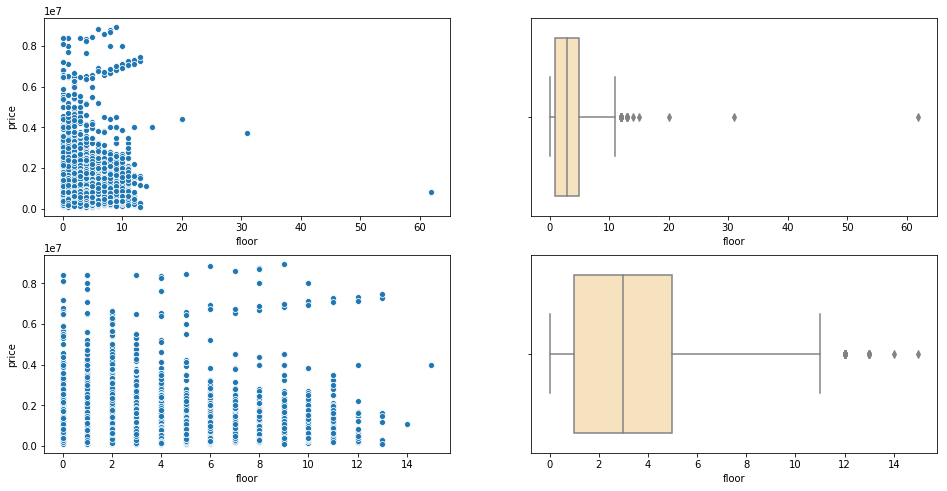

In [47]:
Visualize_effect(properties_data,"floor")

In [48]:
index = df_cap.index   
condition = (df_cap["price"] > 210000) & (df_cap["floor"] >11)
foor_index = index[condition]
df_cap.drop(foor_index, axis =0, inplace = True)
 

In [49]:
#outlier_handel(properties_data,"floor",0.01)

<div class="alert alert-danger" style="padding-bottom:10px; padding-top:5px">[:: B ::] Delete Area Outliers</div> 

In [50]:
df_cap["area"].max()

2500.0

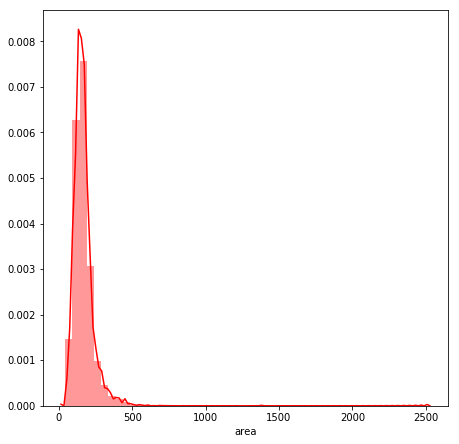

In [51]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
sns.distplot(properties_data['area'],color="red")

plt.show()

In [52]:
df_cap.loc[properties_data["area"]>600]

,address,type,rooms,bathrooms,area,floor,age,finishing,view,zone,price
2290,"Mohamed Youssef Moussa St., 1st Zone",Apartments,3,3,2500.0,10,0,semi_finished,main_street,nasr-city,2700000.0
4518,"Neighbourhood 1, Hai El Yassmin - Eighth Zone",Apartments,7,5,700.0,1,-9,extra_super_lux,main_street,shorouk,3800000.0
4865,"Abou El Farag St., Rod El Farag",Apartments,3,1,1380.0,3,9,super_lux,main_street,shoubra_rod_elfarag,1350000.0


In [53]:
index = df_cap.index
condition = df_cap["area"] >600
area_index = index[condition]

df_cap.drop(area_index, axis =0, inplace = True)

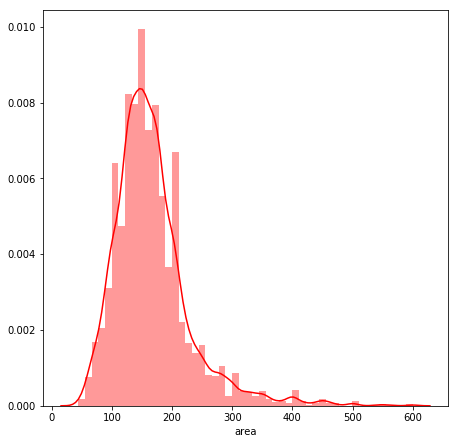

In [54]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
sns.distplot(df_cap['area'],color="red")

plt.show()

In [55]:
#outlier_handel(properties_data,"area",0.05)

In [56]:
 df_cap["area"] = np.where(
        df_cap["area"] > 300, 300,df_cap["area"]
    )

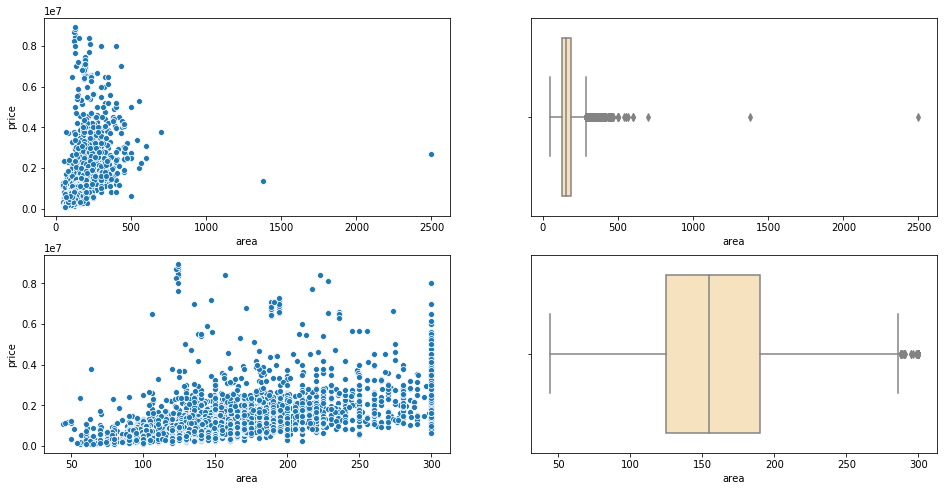

In [57]:
Visualize_effect(properties_data,"area")

<div class="alert alert-danger" style="padding-bottom:10px; padding-top:5px">[:: C ::] Delete Age Outliers</div> 

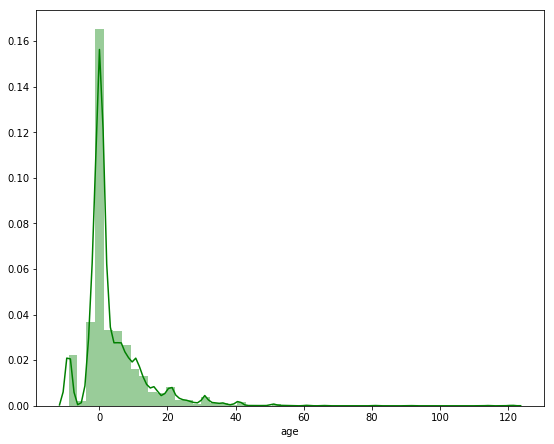

In [58]:
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
sns.distplot(df_cap["age"],color="green")
plt.show()

In [59]:
age_ls= getValues(df_cap,"age")
for i in age_ls:
    df=df_cap.loc[df_cap["age"]==i]
    if len(df)<4:
        index = df_cap.index
        condition = df_cap["age"] ==i
        age_index = index[condition]
        df_cap.drop(age_index, axis =0, inplace = True)


In [60]:
index = df_cap.index
condition = df_cap["age"] >= 30
age_index = index[condition]
df_cap.drop(age_index, axis =0, inplace = True)


In [61]:
#outlier_handel(properties_data,"age",0.03)

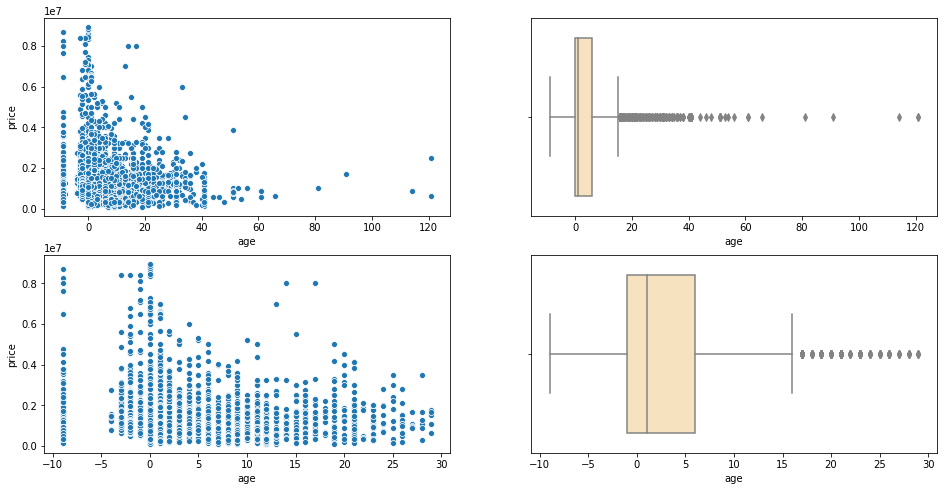

In [62]:
Visualize_effect(properties_data,"age")

In [63]:
index = df_cap.index   
condition = (df_cap["price"] > 250000) & (df_cap["age"] >15)
foor_index = index[condition]
df_cap.drop(foor_index, axis =0, inplace = True)
 

<div class="alert alert-danger" style="padding-bottom:10px; padding-top:5px">[:: D ::] Delete Rooms Outliers</div> 

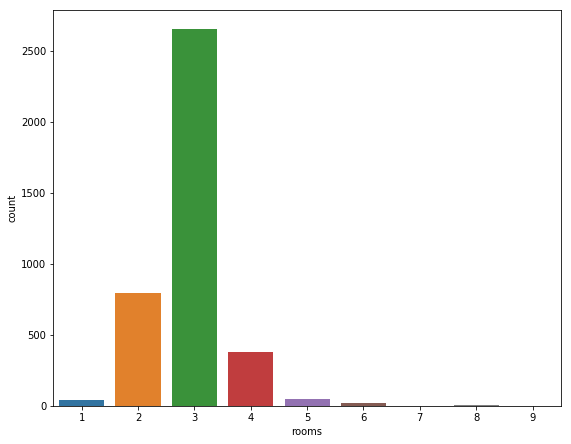

In [64]:
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
sns.countplot(x="rooms",data=df_cap)
plt.show()

In [65]:
 df_cap["rooms"] = np.where(
        df_cap["rooms"] > 5, 5,
     np.where(
        df_cap["rooms"] < 2, 2,df_cap["rooms"]
    )
 )

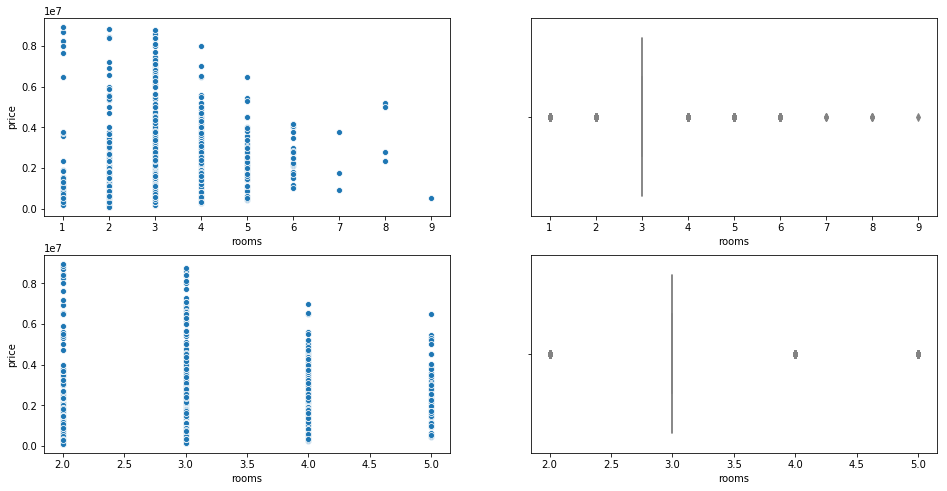

In [66]:
Visualize_effect(properties_data,"rooms")

<div class="alert alert-danger" style="padding-bottom:10px; padding-top:5px">[:: F ::] Delete Bathrooms Outliers</div> 

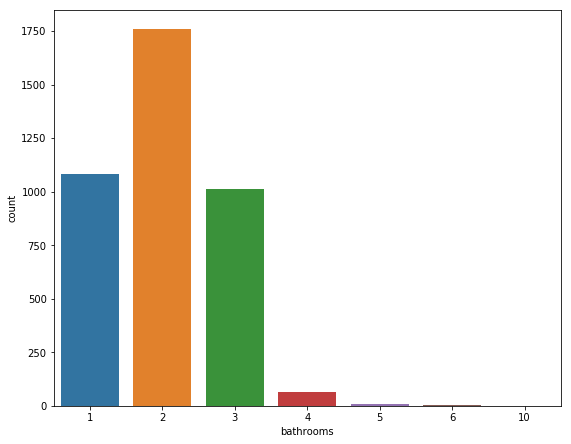

In [67]:
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
sns.countplot(x="bathrooms",data=df_cap)
plt.show()

In [68]:
index = df_cap.index
condition = df_cap["bathrooms"] >=6
bathrooms_index = index[condition]
df_cap.drop(bathrooms_index, axis =0, inplace = True)


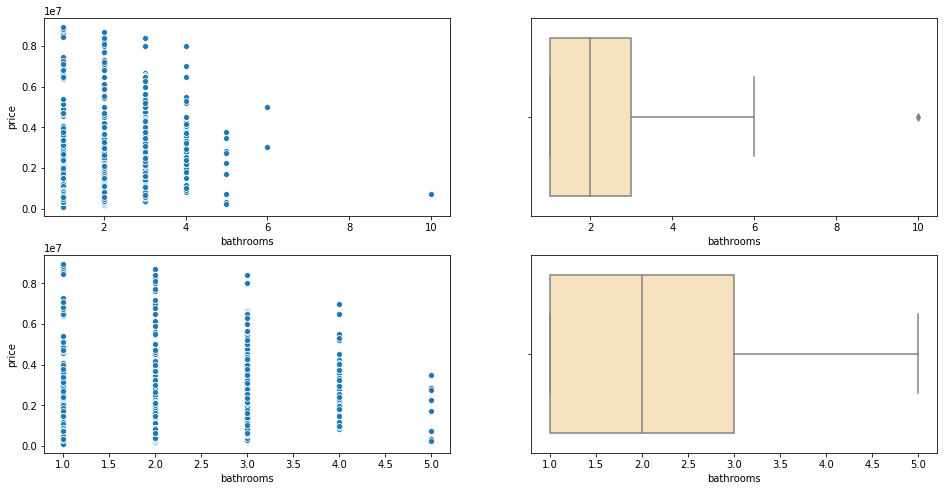

In [69]:
Visualize_effect(properties_data,"bathrooms")

In [70]:
index = df_cap.index
condition = (df_cap["bathrooms"] >= 4)&(df_cap["price"]>6000000)
bathrooms_index = index[condition]
df_cap.drop(bathrooms_index, axis =0, inplace = True)


### Log transformation for Price

In [71]:
df_cap['price']=np.log(df_cap['price'])

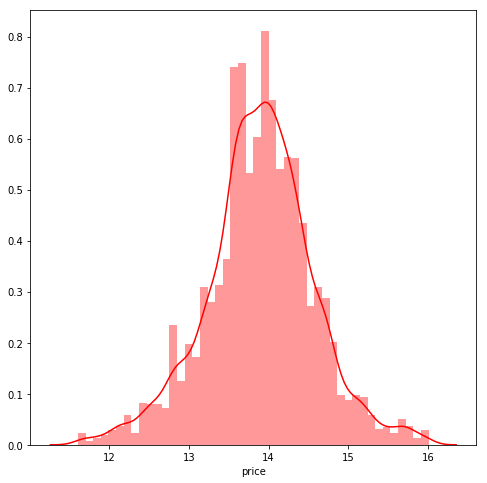

In [72]:
plt.figure(figsize=(8,8))
sns.distplot(df_cap['price'],color="red")
plt.show()

### Corrolation

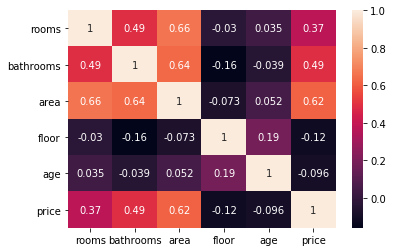

In [73]:
# plotting correlation heatmap
sns.heatmap(df_cap.corr(), annot=True)
  
# displaying heatmap
plt.show()

### Encoding Categorical Values

In [74]:
## One hot encoding using getDummies 
final_properties_df = pd.get_dummies(df_cap, columns = ['finishing', 'view',"zone"])

<div class="alert alert-info" style="padding-bottom:20px; padding-top:5px"><h4 class="text-uppercase">:: split Dataset </h4> </div>

In [75]:
Y = final_properties_df['price']
X = final_properties_df.drop('price', axis=1)
X.drop('address', axis=1,inplace=True)
X.drop('type', axis=1,inplace=True)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=10)

<div class="alert alert-info" style="padding-bottom:20px; padding-top:5px"><h4 class="text-uppercase">:: Standerization </h4> </div>

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train) 
X_test=scaler.transform(X_test)

C:\Users\user\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


<div class="alert alert-info" style="padding-bottom:20px; padding-top:5px"><h4 class="text-uppercase">:: Training and Evaluating Models </h4> </div>

In [214]:
mse_ls=[]
rmse_ls=[]
rmsle_ls=[]
r2_train_ls=[]
r2_cv_ls=[]

In [215]:
def train_evaluate(model_name,model_):
    model_.fit(X_train,y_train)
    model_predicted= model_.predict(X_test)
    ######################################
    mse=mean_squared_log_error(y_test,model_predicted)
    rmse=np.sqrt(mean_squared_error(y_test,model_predicted))
    rmsle=np.sqrt(mean_squared_log_error(y_test,model_predicted))
    r2_train=r2_score(y_test,model_predicted)
    #############################################################
    if (model_name !=" LASSO " ):
        mse_ls.append(mse)
        rmse_ls.append(rmse)
        rmsle_ls.append(rmsle)
        r2_train_ls.append(r2_train)
    ##########################################################################
    print ("##train-test-split tech >>")
    print('defualt accuracy using'+model_name+" : "+format (model_.score(X_test,y_test)))
    print('mean squared error using'+model_name+" : "+ format(mse))
    print('Root mean squared error using'+model_name+" : "+ format(rmse))
    print('Root mean squared log error using'+model_name+" : "+format(rmsle))
    print('R-squar using  '+model_name+" : "+ format(r2_train))
    #######################################################################
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    r2_scores=cross_val_score(model_ , X,Y, cv=cv,scoring='r2')
    r2_cv=r2_scores.mean()
    r2_cv_ls.append(r2_cv)
    
    ####################################################
    print ("##5-fold CV tech >>")
    print ('R squared using '+model_name+format(r2_cv))
    ###############################################
    expected=y_test
    plt.figure(figsize=(8, 8))

    plt.scatter(expected, model_predicted)

    plt.axis('tight')

    plt.xlabel('Actual price ')

    plt.ylabel('Predicted price')

    plt.tight_layout()
   

`Model one` <b> Linear Regrestion </b>

##train-test-split tech >>
defualt accuracy usingLinear Regression : 0.644333501364
mean squared error usingLinear Regression : 0.000712265010572
Root mean squared error usingLinear Regression : 0.399126815311
Root mean squared log error usingLinear Regression : 0.0266882935118
R-squar using  Linear Regression : 0.644333501364
##5-fold CV tech >>
R squared using Linear Regression0.681865144711


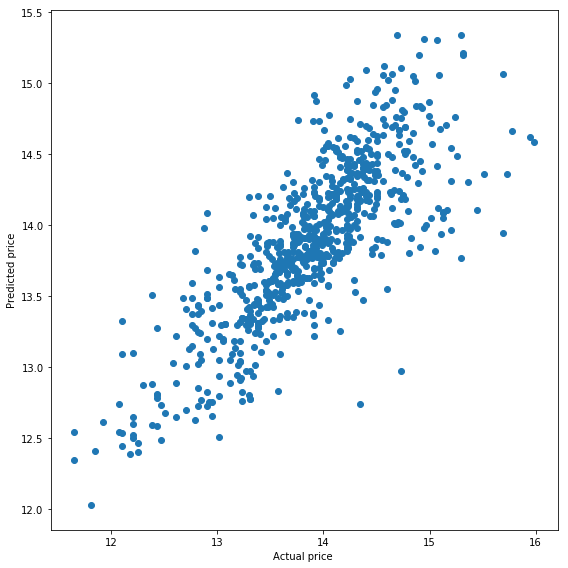

In [216]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
train_evaluate("Linear Regression",lr_model)

`Model two` <b> Ridge Regression </b>

##train-test-split tech >>
defualt accuracy using Ridge Regression  : 0.644237323439
mean squared error using Ridge Regression  : 0.000712466520359
Root mean squared error using Ridge Regression  : 0.399180776809
Root mean squared log error using Ridge Regression  : 0.0266920684916
R-squar using   Ridge Regression  : 0.644237323439
##5-fold CV tech >>
R squared using  Ridge Regression 0.681810421123


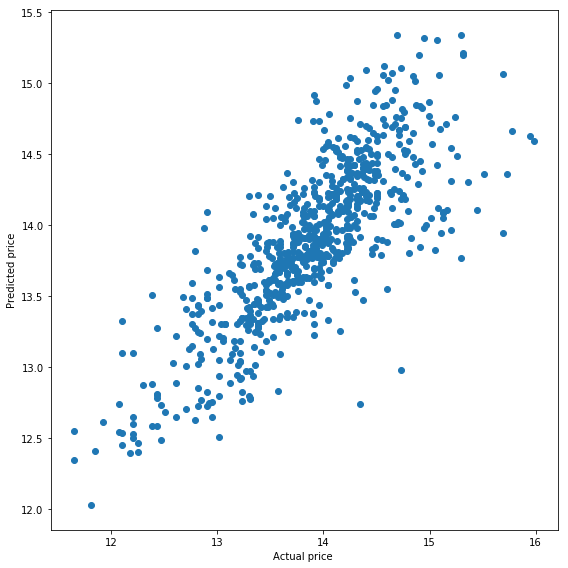

In [217]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
train_evaluate(" Ridge Regression ",ridge_model)

`Model three` <b> LASSO Regression </b>

##train-test-split tech >>
defualt accuracy using LASSO  : 0.410499251968
mean squared error using LASSO  : 0.0012117510882
Root mean squared error using LASSO  : 0.513844375703
Root mean squared log error using LASSO  : 0.0348102152852
R-squar using   LASSO  : 0.410499251968
##5-fold CV tech >>
R squared using  LASSO 0.401272289213


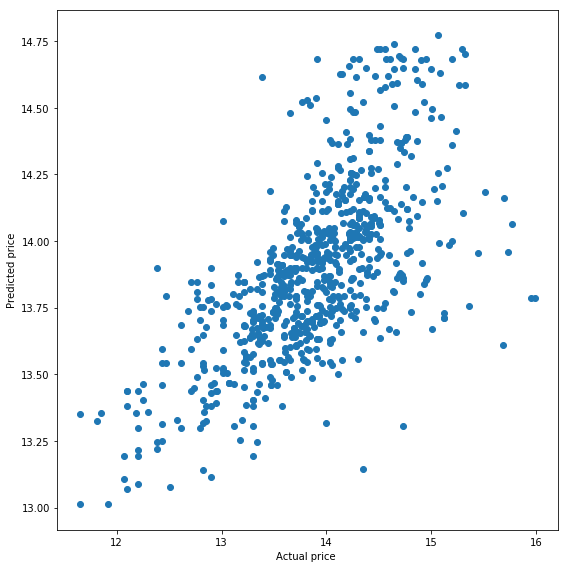

In [218]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
train_evaluate(" LASSO ",lasso_model)

`Model four` <b> XGB Regression </b>

In [219]:
#import sys
#!{sys.executable} -m pip install xgboost

##train-test-split tech >>
defualt accuracy using XGBoost  : 0.74093412998
mean squared error using XGBoost  : 0.000526473479361
Root mean squared error using XGBoost  : 0.340639124519
Root mean squared log error using XGBoost  : 0.0229450099011
R-squar using   XGBoost  : 0.74093412998
##5-fold CV tech >>
R squared using  XGBoost 0.768303526564


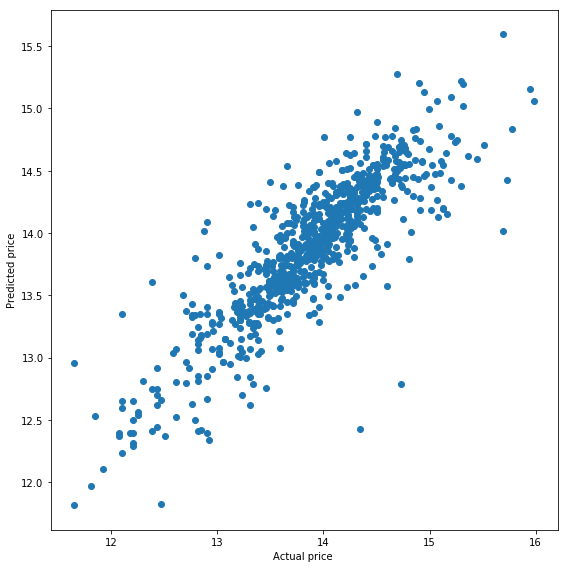

In [220]:
from xgboost import XGBRegressor
xg_model = XGBRegressor(n_estimators=300)
train_evaluate(" XGBoost ",xg_model)

`Model five` <b> RandomForest Regression </b>

##train-test-split tech >>
defualt accuracy using Random forest  : 0.741985008165
mean squared error using Random forest  : 0.000525787541712
Root mean squared error using Random forest  : 0.339947535963
Root mean squared log error using Random forest  : 0.0229300576038
R-squar using   Random forest  : 0.741985008165
##5-fold CV tech >>
R squared using  Random forest 0.776301693065


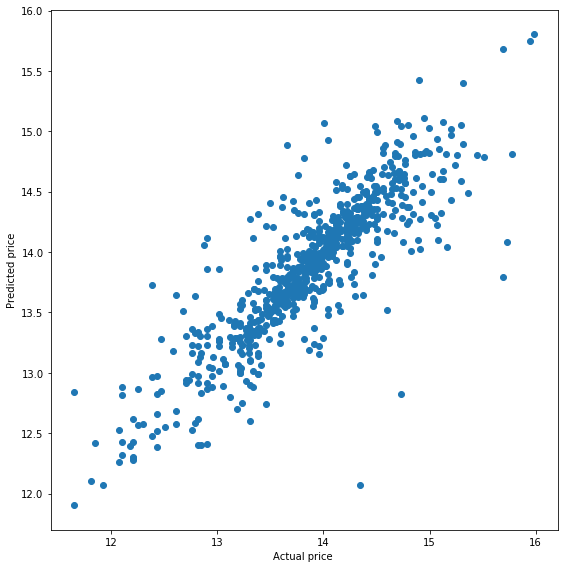

In [221]:
from sklearn.ensemble import RandomForestRegressor
RFmodel=RandomForestRegressor(n_estimators=700, random_state=0)
train_evaluate(" Random forest ",RFmodel)

`Model six` <b> Suppor vector regression (SVR) </b>

##train-test-split tech >>
defualt accuracy using SVR  : 0.709263302646
mean squared error using SVR  : 0.000586689617346
Root mean squared error using SVR  : 0.360860505715
Root mean squared log error using SVR  : 0.0242216766006
R-squar using   SVR  : 0.709263302646
##5-fold CV tech >>
R squared using  SVR 0.71925322362


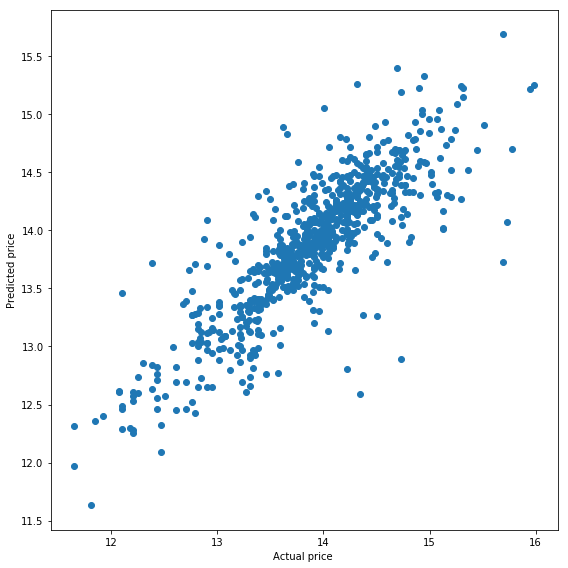

In [222]:
from sklearn.svm import SVR
SVRmodel= SVR(kernel='rbf', C=300, gamma=0.001, epsilon=0.0001)
train_evaluate(" SVR ",SVRmodel)

`Model seven` <b> Polynomial Regrestion </b>

In [223]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X_train)

##train-test-split tech >>
defualt accuracy using Polynominal Regression : 0.644333501364
mean squared error using Polynominal Regression : 0.000712265010572
Root mean squared error using Polynominal Regression : 0.399126815311
Root mean squared log error using Polynominal Regression : 0.0266882935118
R-squar using   Polynominal Regression : 0.644333501364
##5-fold CV tech >>
R squared using  Polynominal Regression0.681865144711


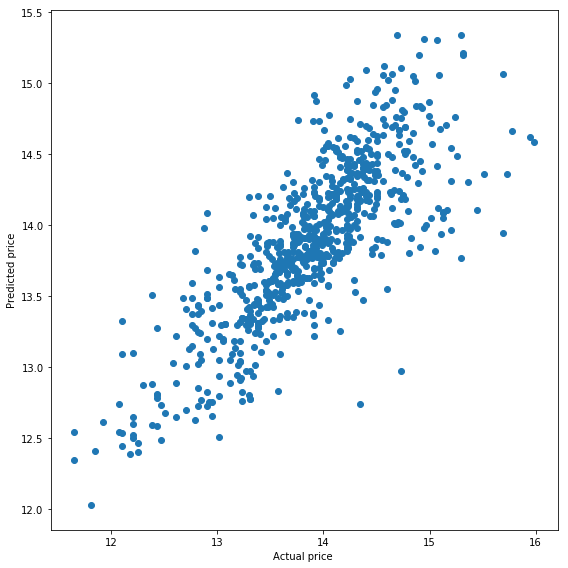

In [224]:
from sklearn import linear_model
pr_model = LinearRegression()
train_evaluate(" Polynominal Regression",pr_model)

<div class="alert alert-info" style="padding-bottom:20px; padding-top:5px"><h4 class="text-uppercase">:: Result Visualization </h4> </div>

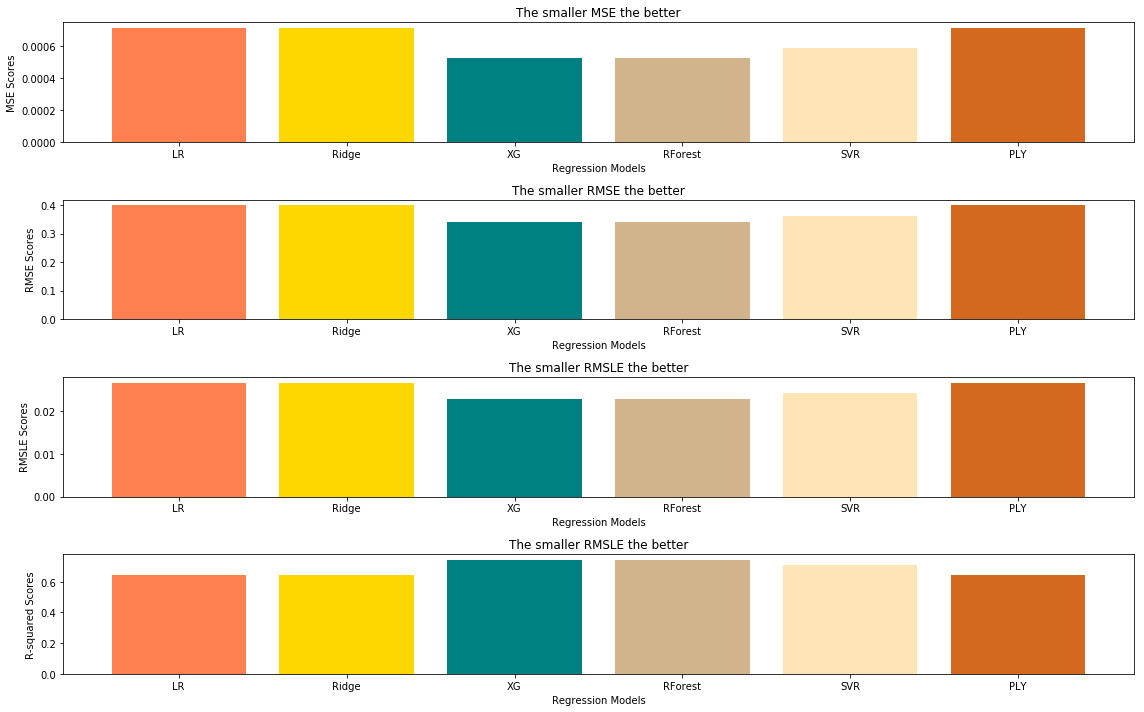

In [234]:
models = ['LR', 'Ridge','XG','RForest','SVR','PLY']
c = ["coral", "gold", "teal", "tan","moccasin","chocolate"]
plt.figure(figsize=(16,10))
 

#bar plot
plt.subplot(4,1,1)
plt.bar(models, height = mse_ls, color = c)
plt.xlabel('Regression Models')
plt.ylabel('MSE Scores')
plt.title('The smaller MSE the better')

plt.subplot(4,1,2)
plt.bar(models, height = rmse_ls, color = c)
plt.xlabel('Regression Models')
plt.ylabel('RMSE Scores')
plt.title('The smaller RMSE the better')


plt.subplot(4,1,3)
plt.bar(models, height = rmsle_ls, color = c)
plt.xlabel('Regression Models')
plt.ylabel('RMSLE Scores')
plt.title('The smaller RMSLE the better')

plt.subplot(4,1,4)
plt.bar(models, height = r2_train_ls, color = c)
plt.xlabel('Regression Models')
plt.ylabel('R-squared Scores')
plt.title('The smaller RMSLE the better')

plt.tight_layout()
plt.show()

<div class="alert alert-info" style="padding-bottom:20px; padding-top:5px"><h4 class="text-uppercase">:: Implementation</h4> </div>

In [264]:
def predict_price(rooms, bathrooms , area , floor , age , finishing , view,zone):
    x = np.zeros(len(X.columns))
    ## View 
    view_index = np.where(X.columns==view)[0][0]
    ## finishing
    finishing_index = np.where(X.columns==finishing)[0][0]
      ## zone
    zone_index = np.where(X.columns==zone)[0][0]

    x[0] = rooms
    x[1] = bathrooms
    x[2] = area
    x[3] = floor
    x[4] =  age
       
    if finishing_index >= 0:
        x[finishing_index] = 1

    if view_index >= 0:
        x[view_index] = 1
    
    if zone_index >= 0:
        x[zone_index] = 1

    xTest_df = scaler.transform([x])
    return np.exp(RFmodel.predict(xTest_df)[0])



In [265]:
price=predict_price(4,4,170,0,0,"finishing_super_lux","view_side_street","zone_el_maadi_el_gededa")
price

1619861.79321929

In [266]:
np.exp(14.346)

1699764.0410320407

In [267]:
price=predict_price(2,1,69,3,0,"finishing_super_lux","view_side_street","zone_el_maadi_el_gededa")
price

302202.5744083514

In [268]:
np.exp(12.821)

369904.44703091163

#### Get Pickle file for Flask APP


In [271]:
import pickle
with open('RF_model.pickle','wb') as f:
    pickle.dump(RFmodel,f)

In [232]:
import pickle
with open('scaler.pickle','wb') as f:
    pickle.dump(scaler,f)